# Heart Attack Analysis
##### El siguiente notebook es un análisis de casos referentes a ataques cardiacos, la fuente original de estos datos proviene de https://archive.ics.uci.edu/ml/datasets/Heart+Disease.

La descripción de las variables se muestra a continuación:

1. **edad** - Edad en años

2. **sexo** - Sexo (1 = masculino; 0 = femenino)

3. **dp** - Tipo de dolor de pecho (1 = Angina típica; 2 = Angina atípica; 3 = dolor no anginoso; 0 = asintomático(a))

4. **parterial** - Presión arterial (en mm Hg al momento de ingresar al Hospital)

5. **col** - Colesterol en mg/dl

6. **asa** - Análisis de azucar en la sangre en ayunas > 120 mg/dl (1 = true; 0 = false)

7. **relectro** - Resultados electrocardiográficos (1 = normal; 2 = anomalía en la onda ST-T; 0 = hipertrofia)

8. **fcardio** - Frecuencia cardíaca máxima

9. **angind** - Angina inducida por ejecicio (1 = si; 0 = no)

10. **oldpeak** - Depresión del ST inducida por el ejercicio en relación con el reposo

11. **pendt** - Pendiente del segmento ST (2 = ascendente; 1 = plana; 0 = descendente)

12. **ca** - Número de vasos principales (0-3) coloreados por fluoroscopia

13. **fcard** - 2 = normal; 1 = defecto arreglado; 3 = defecto reversible

14. **output** - Diagnóstico de enfermedad cardíaca (estado de la enfermedad angiográfica) (Valor 0 = < estrechamiento del diámetro; Valor 1 = > 50 % de estrechamiento del diámetro)


1. Librerías a utilizar

In [3]:
# Impotamos las librerías a utilizar

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import os

2. Importamos el Dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
os.chdir(r"C:\Users\Gigabyte\Documents\Development\Bootcamp_CD_Codigo_Facilito\proyecto-final-BCD\data")
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
new_columns = ["edad", "sexo", "dp", "parterial", "col", "asa", "relectro", "fcardio", "angind", "oldpeak", "pendt", "ca", "fcard", "target"]
df.columns = new_columns
df.head()

,edad,sexo,dp,parterial,col,asa,relectro,fcardio,angind,oldpeak,pendt,ca,fcard,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


3. Análisis de los datos numéricos

In [9]:
# Se define los datos numéricos

numeric_values = ["edad", "parterial", "col", "fcardio", "oldpeak"]
df[numeric_values].describe()

,edad,parterial,col,fcardio,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


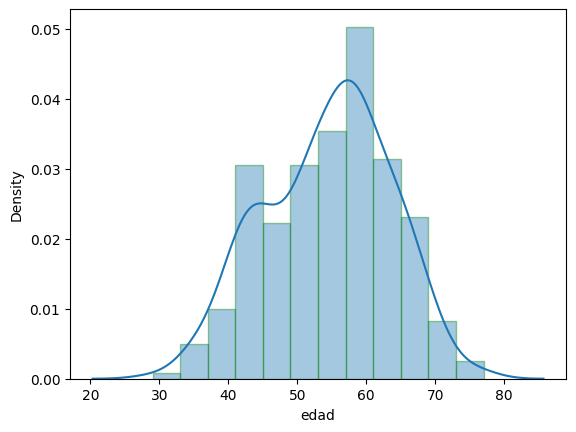

In [15]:
# Graficando la variable "edad"

sns.distplot(df["edad"], hist_kws = dict(linewidth = 1, edgecolor = "g"));

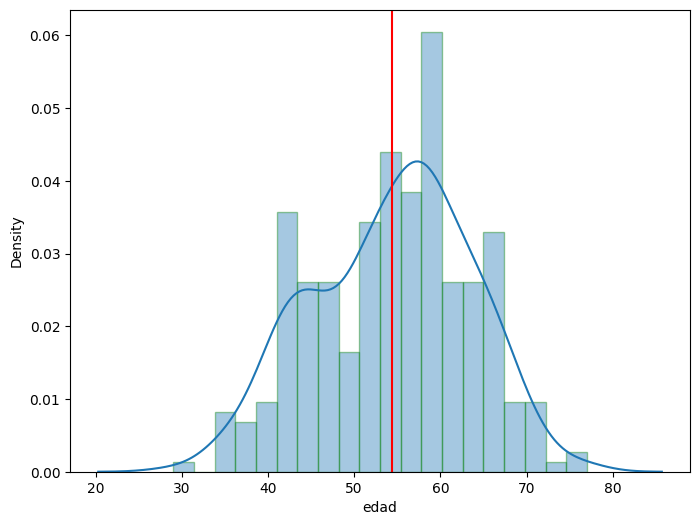

In [23]:
# Se traza una línea para comparar con el promedio (mean)

x, y = plt.subplots(figsize = (8, 6))
sns.distplot(df["edad"], hist_kws = dict(linewidth = 1, edgecolor = "g"), bins = 20, ax = y)
y.axvline(df["edad"].mean(), color = "r", ls = "-");

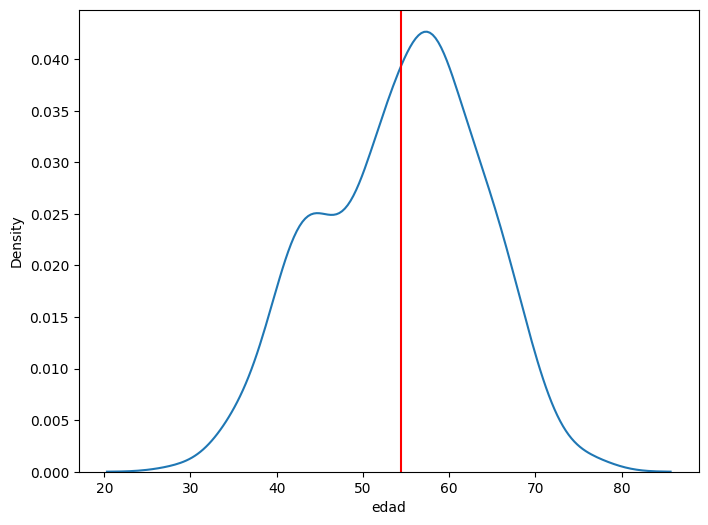

In [24]:
x, y = plt.subplots(figsize = (8, 6))
sns.distplot(df["edad"], hist = False, ax = y)
y.axvline(df["edad"].mean(), color = "r", ls = "-");

In [25]:
# Análisis de las variables numéricas juntas

numeric_values
numeric_axis_names = ["Edad del paciente", "Presión arterial", "Colesterol", "Frecuencia cardiaca máxima", "Depresión del ST"]
list(zip(numeric_values, numeric_axis_names))

[('edad', 'Edad del paciente'),
 ('parterial', 'Presión arterial'),
 ('col', 'Colesterol'),
 ('fcardio', 'Frecuencia cardiaca máxima'),
 ('oldpeak', 'Depresión del ST')]

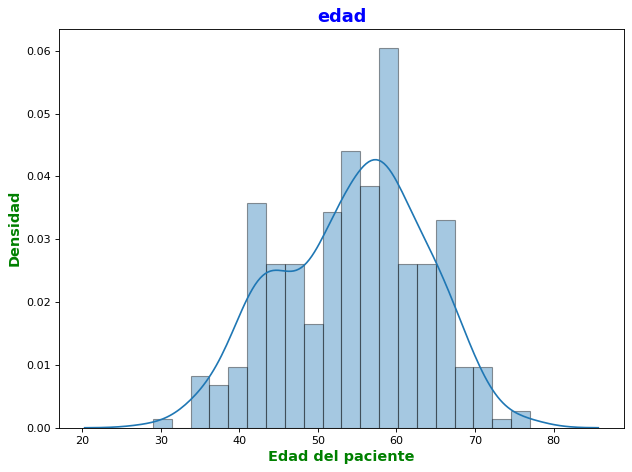

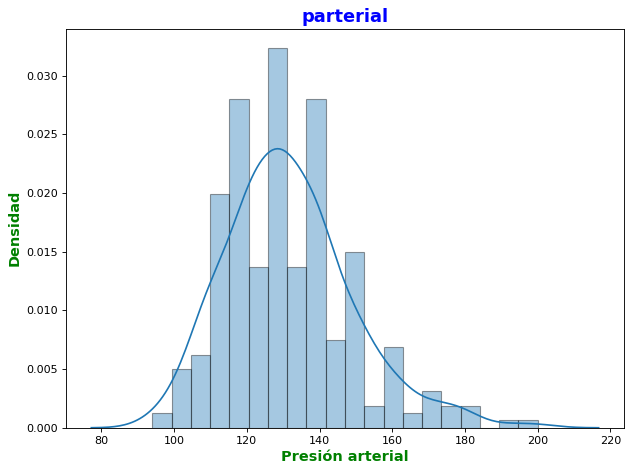

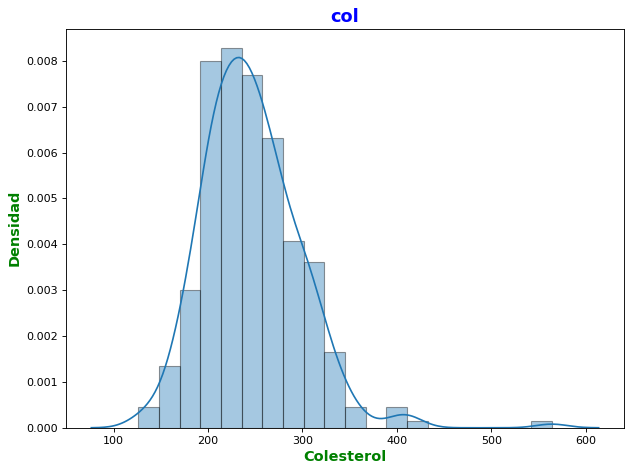

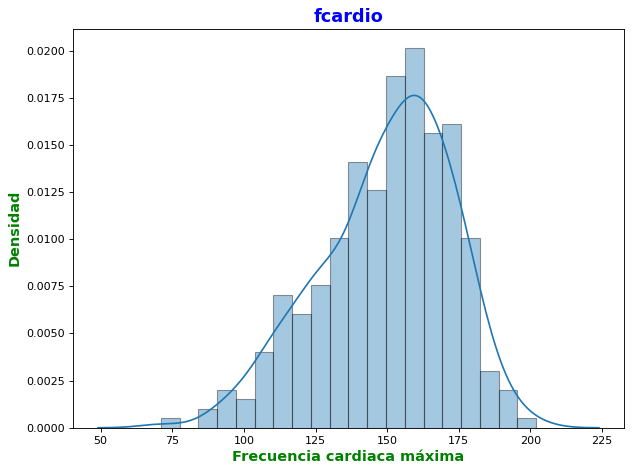

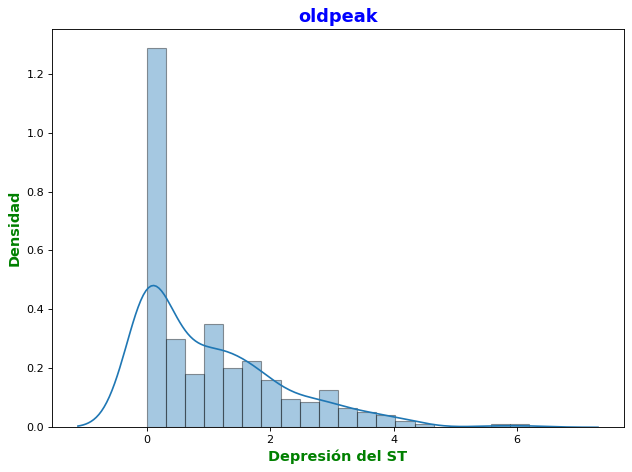

In [30]:
title_font = {"family" : "arial", "color" : "Blue", "weight" : "bold", "size" : 16}
axis_font = {"family" : "arial", "color" : "green", "weight" : "bold", "size" : 13}

for i, j in list(zip(numeric_values, numeric_axis_names)):
    plt.figure(figsize = (8, 6), dpi = 80)
    sns.distplot(df[i], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20)

    plt.title(i, fontdict = title_font)
    plt.xlabel(j, fontdict = axis_font)
    plt.ylabel("Densidad", fontdict = axis_font)

    plt.tight_layout()
    plt.show()

In [31]:
# Para las otras variables del DataFrame se usa el pie chart

categoric_variables = ["sexo", "dp", "asa", "relectro", "angind", "pendt", "ca","fcard", "target"]
categoric_axis_names = ["Sexo del Paciente", "Tipo de dolor de pecho", "Análisis de azucar en la sangre en ayunas", "Resultados electrocardiográficos", "Angina inducida por ejecicio", "Pendiente del segmento ST", "Número de vasos principales", "Frecuencia cardiaca", "Targe0t"]
list(zip(categoric_variables, categoric_axis_names))

[('sexo', 'Sexo del Paciente'),
 ('dp', 'Tipo de dolor de pecho'),
 ('asa', 'Análisis de azucar en la sangre en ayunas'),
 ('relectro', 'Resultados electrocardiográficos'),
 ('angind', 'Angina inducida por ejecicio'),
 ('pendt', 'Pendiente del segmento ST'),
 ('ca', 'Número de vasos principales'),
 ('fcard', 'Frecuencia cardiaca'),
 ('target', 'Targe0t')]

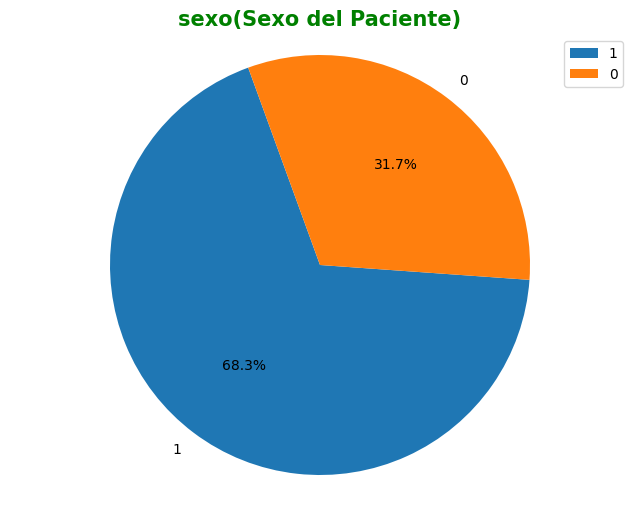

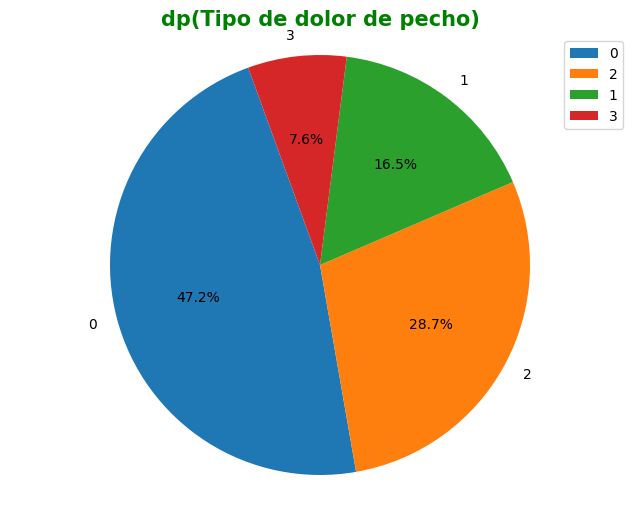

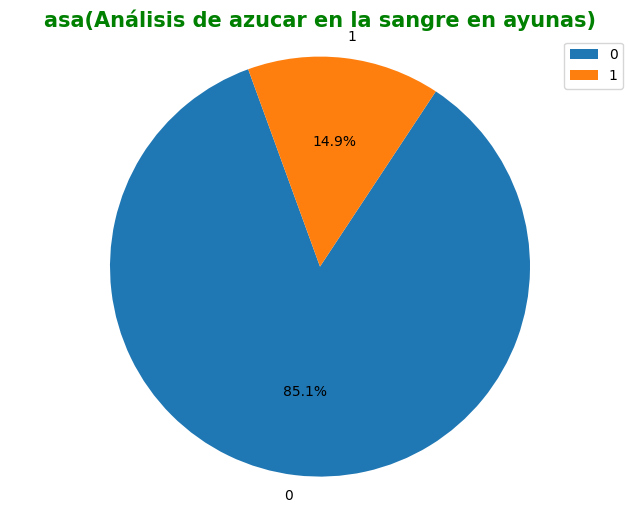

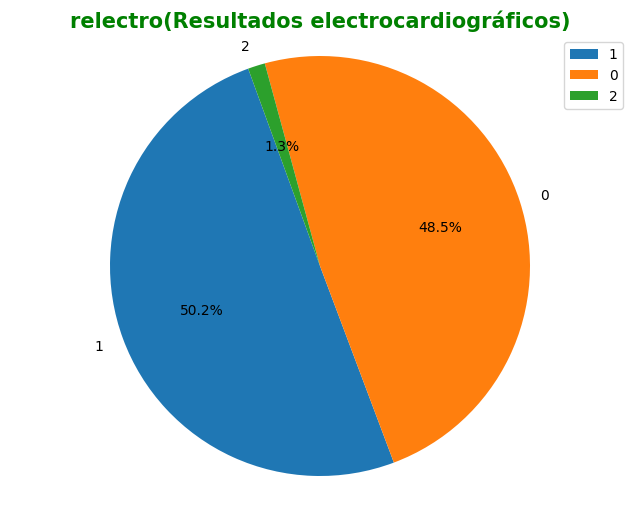

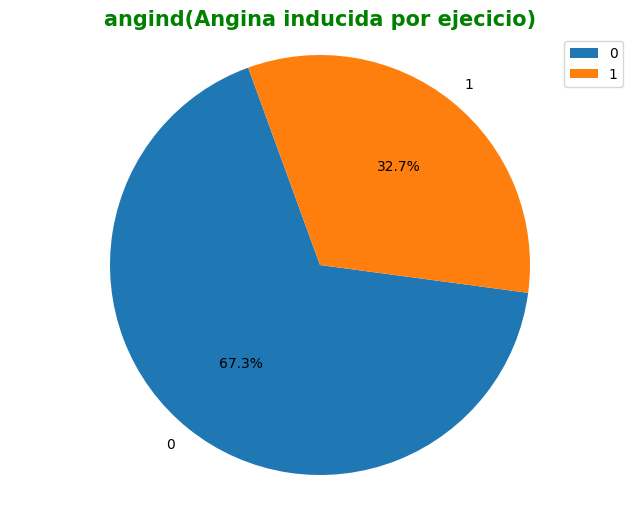

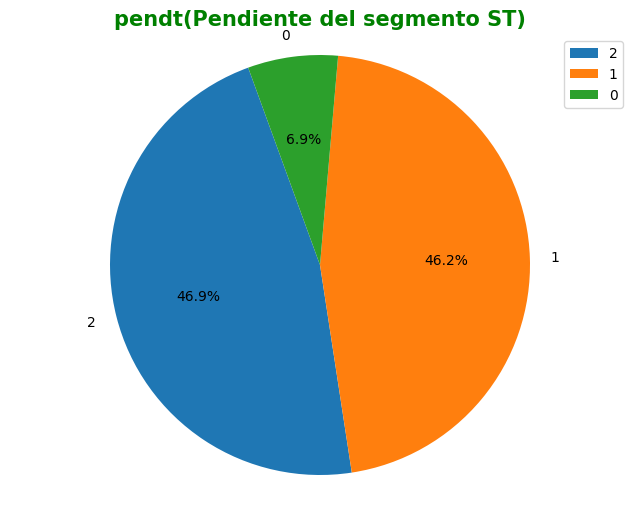

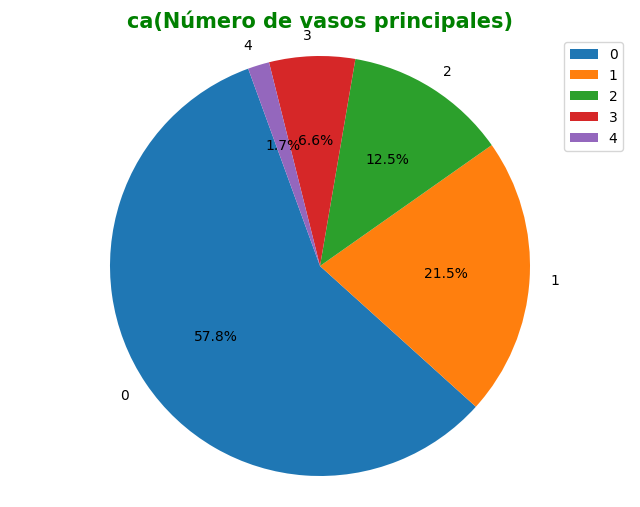

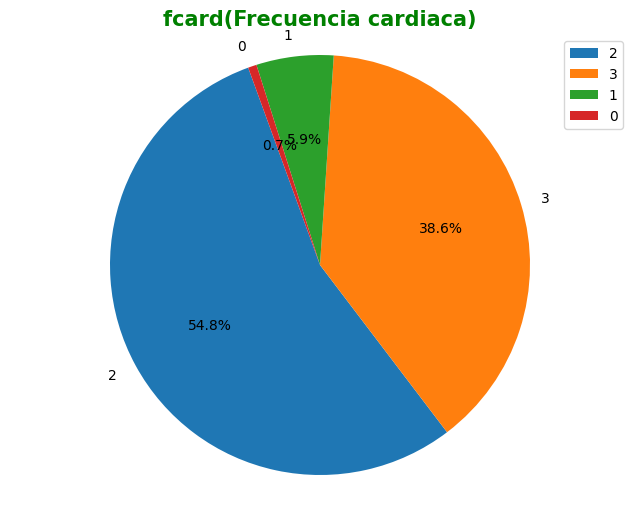

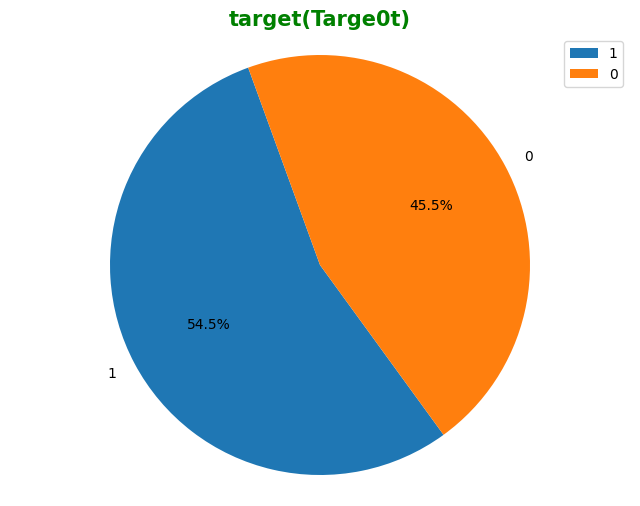

In [33]:
title_font = {"family" : "arial", "color" : "green", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "blue", "weight" : "bold", "size" : 13}

for i, z in list(zip(categoric_variables, categoric_axis_names)):
    fig, ax = plt.subplots(figsize = (8, 6))

    observation_values = list(df[i].value_counts().index)
    total_observation_values = list(df[i].value_counts())

    ax.pie(total_observation_values, labels= observation_values, autopct = '%1.1f%%', startangle = 110, labeldistance = 1.1)
    ax.axis("equal")

    plt.title((i + "(" + z + ")"), fontdict = title_font)
    plt.legend()
    plt.show()

In [34]:
# Se pasa la comparación de target con los valores numéricos
# Se incluye en los valores numéricos el target

numeric_values.append("target")
numeric_values

['edad', 'parterial', 'col', 'fcardio', 'oldpeak', 'target']

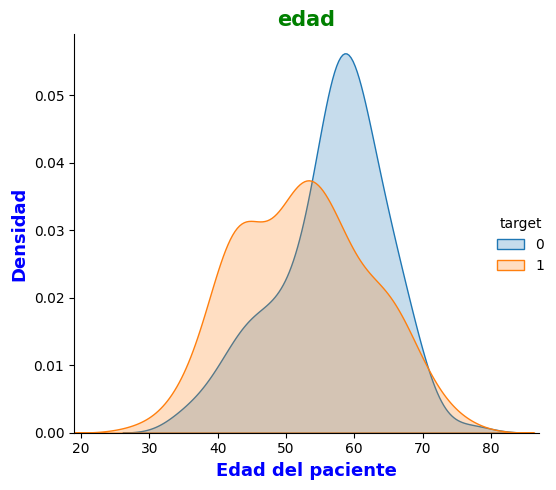

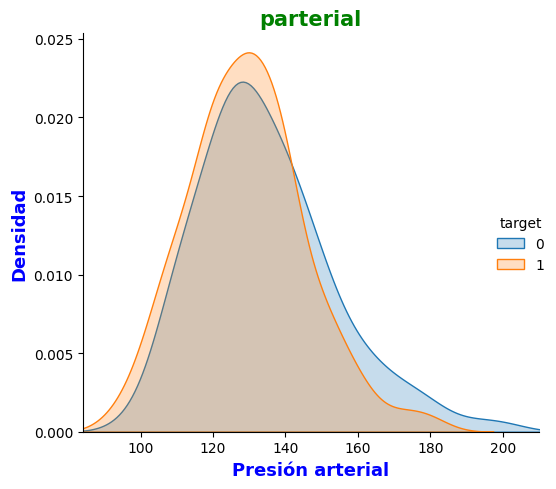

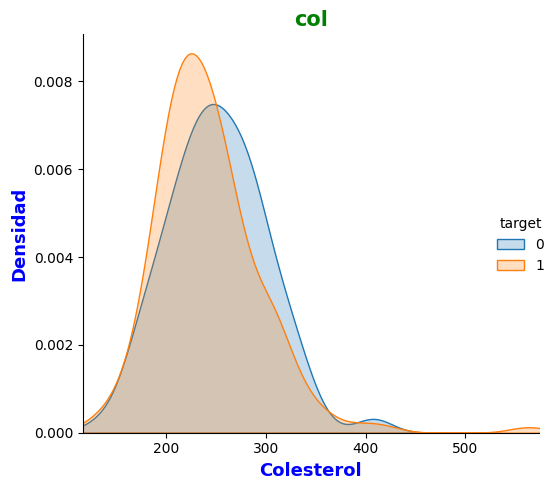

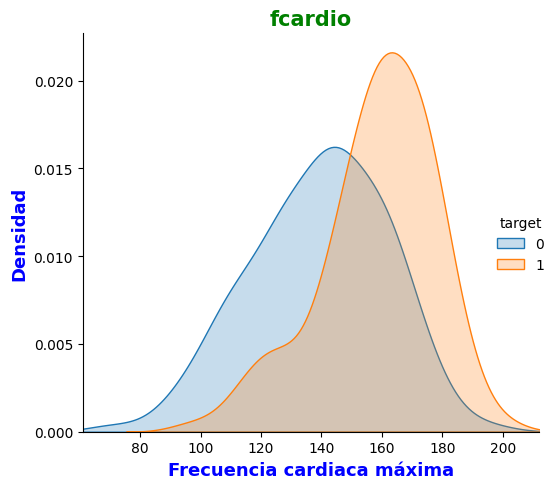

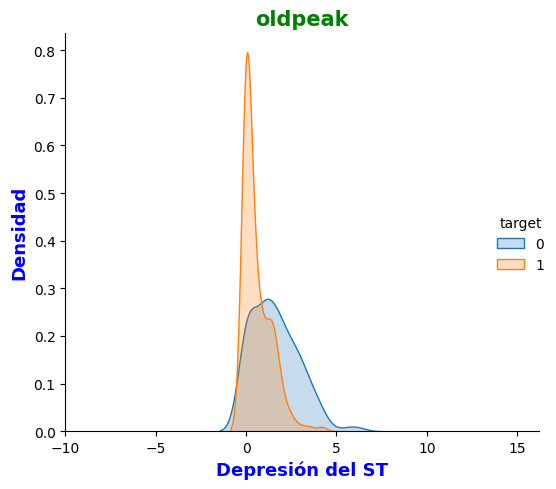

In [35]:
title_font = {"family" : "arial", "color" : "green", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "blue", "weight" : "bold", "size" : 13}

for i, z in list(zip(numeric_values, numeric_axis_names)):
    graph = sns.FacetGrid(df[numeric_values], hue = "target", height = 5, xlim = ((df[i].min() - 10), (df[i].max() + 10)))
    graph.map(sns.kdeplot, i, shade = True)
    graph.add_legend()

    plt.title(i, fontdict = title_font)
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel("Densidad", fontdict = axis_font)

    plt.tight_layout()
    plt.show()

In [37]:
# Correlación

df[numeric_values].corr()

,edad,parterial,col,fcardio,oldpeak,target
edad,1.000000,0.279351,0.213678,-0.398522,0.210013,-0.225439
parterial,0.279351,1.000000,0.123174,-0.046698,0.193216,-0.144931
col,0.213678,0.123174,1.000000,-0.009940,0.053952,-0.085239
fcardio,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,0.421741
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000,-0.430696
target,-0.225439,-0.144931,-0.085239,0.421741,-0.430696,1.000000


## Glosario de términos


*   Angina: Presión o dolor en el pecho
*   Depresión del ST: Son alteraciones electrocardiográficas comunes.

*   Fluoroscopia: Es un tipo de radiografía que muestra en tiempo real órganos, tejidos y otras estructuras internas en movimiento





